In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('../data/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_RGB2BGR)

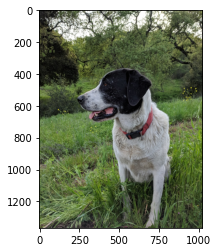

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('../data/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_RGB2BGR)

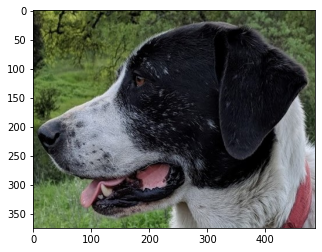

In [5]:
plt.imshow(face)

In [6]:
face.shape

(375, 486, 3)

In [7]:
sum([1,2,3])

6

In [8]:
string = 'sum'
eval(string)

<function sum(iterable, /, start=0)>

In [9]:
function = eval(string)
function([1,2,3])

6

In [10]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

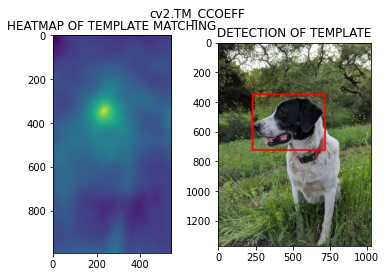

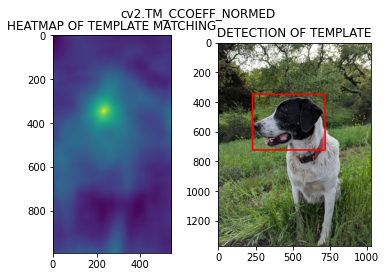

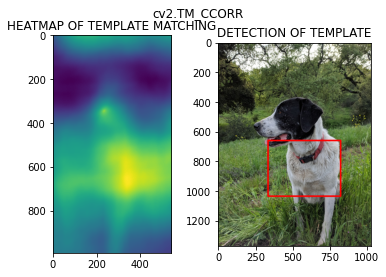

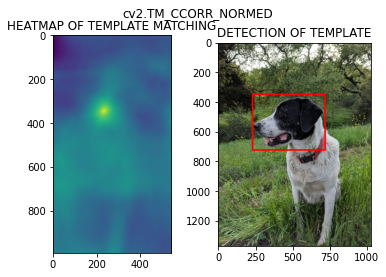

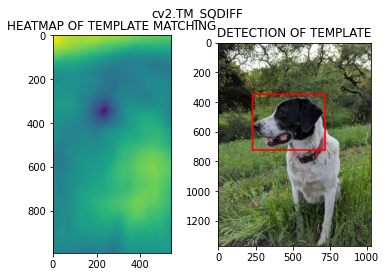

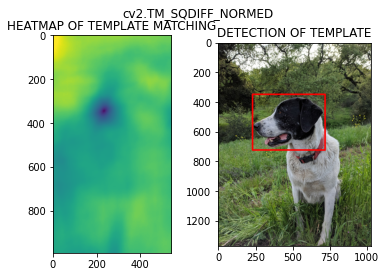

In [11]:
for m in methods:

    # CREATE A COPY
    full_copy = full.copy()

    method = eval(m)

    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy,face,method)

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc

    height,width,channels = face.shape

    bottom_right = (top_left[0]+width,top_left[1]+height)

    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)

    # PLOT AND SHOW IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')

    # TITLE WITH THE METHOD USED
    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')
